In [3]:
import pandas as pd
import seaborn as sns

In [ ]:
def matching(dataframe, index_column, data_column):
    dataframe = dataframe.loc[:, [index_column, data_column]]
    dataframe = dataframe.drop_duplicates()
    duplicates = dataframe[dataframe.duplicated(subset=index_column, keep=False)]

    print(duplicates.head())

    matched = dataframe.groupby(index_column)[data_column].count().unique().max() == 1
    print(f"columns {index_column} and {data_column} are ", end="")
    if matched: print("one-to-one")
    else:       print("one-to-many")
    print()

In [ ]:
articles = pd.read_csv("data/articles.csv")

In [ ]:
articles.head()

In [ ]:
matching(articles, "product_code", "prod_name")

In [ ]:
matching(articles, "product_type_no", "product_type_name")
matching(articles, "graphical_appearance_no", "graphical_appearance_name")
matching(articles, "colour_group_code", "colour_group_name")
matching(articles, "perceived_colour_value_id", "perceived_colour_value_name")
matching(articles, "perceived_colour_master_id", "perceived_colour_master_name")
matching(articles, "department_no", "department_name")
matching(articles, "index_code", "index_name")
matching(articles, "index_group_no", "index_group_name")
matching(articles, "section_no", "section_name")
matching(articles, "garment_group_no", "garment_group_name")

In [ ]:
articles = pd.read_csv("data/articles.csv", dtype=str)
articles.head()

In [ ]:
articles.isna().sum()

In [ ]:
customers = pd.read_csv("data/customers.csv")

In [ ]:
customers.head()

In [ ]:
for column in customers:
    print(column)
    print(customers[column].unique())
    print()

In [ ]:
customers.isna().sum()

In [ ]:
customers.isna().sum() / customers.shape[0] * 100

In [ ]:
sns.histplot(customers["age"])

In [ ]:
customers["age"].describe()

In [4]:
transactions_train = pd.read_csv("data/transactions_train.csv", dtype={"article_id": str})

In [11]:
transactions_train.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,0.016932,2


In [12]:
transactions_train.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [13]:
transactions_train.nunique()

t_dat                   734
customer_id         1362281
article_id           104547
price                  9857
sales_channel_id          2
dtype: int64

In [14]:
transactions_train["sales_channel_id"].unique()

array([2, 1])

In [15]:
transactions_train["price"].describe()

count    3.178832e+07
mean     2.782927e-02
std      1.918113e-02
min      1.694915e-05
25%      1.581356e-02
50%      2.540678e-02
75%      3.388136e-02
max      5.915254e-01
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

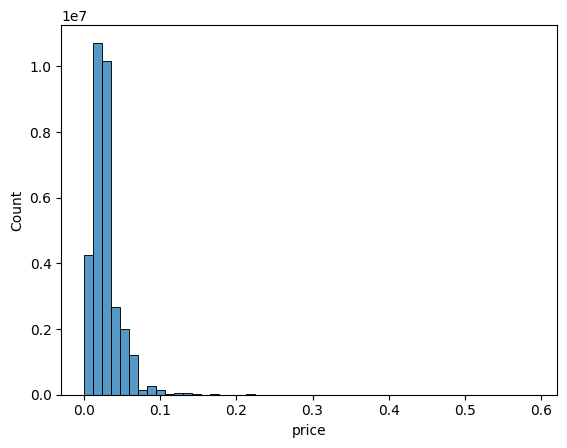

In [10]:
sns.histplot(transactions_train["price"], bins=50)